# SpaceX Falcon 9 first stage landing Prediction

### Falcon 9 

![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module\_1\_L2/images/Falcon9\_rocket_family.svg)

### Successful landings

![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing\_1.gif)

### Unsuccessful landings

![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


## Data collection: API 

In [6]:
import sys
print(sys.version)

3.10.4 (main, Mar 31 2022, 03:38:35) [Clang 12.0.0 ]


In [44]:
import requests
import pandas as pd
import numpy as np
import datetime

# Setting this option will print all collumns of a dataframe
pd.set_option('display.max_columns', None)
# Setting this option will print all of the data in a feature
pd.set_option('display.max_colwidth', None)

In [45]:
#  data url
spacex_url="https://api.spacexdata.com/v4/launches/past"
static_json_url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/API_call_spacex_api.json'

In [21]:
# using request library 
# response = requests.get(spacex_url)
# using static json for reproducibility
response = requests.get(static_json_url)
# print(response.content)
print('response status code: ' + str(response.status_code))
# # Use json_normalize meethod to convert the json result into a dataframe
data = pd.json_normalize(response.json())

response status code: 200


In [46]:
# using urllib library
import urllib
import json
uh = urllib.request.urlopen(static_json_url)
jsdata = json.loads(uh.read().decode())
data = pd.json_normalize(jsdata)

In [47]:
# Get the head of the dataframe
data.head()

,static_fire_date_utc,static_fire_date_unix,tbd,net,window,rocket,success,details,crew,ships,capsules,payloads,launchpad,auto_update,failures,flight_number,name,date_utc,date_unix,date_local,date_precision,upcoming,cores,id,fairings.reused,fairings.recovery_attempt,fairings.recovered,fairings.ships,links.patch.small,links.patch.large,links.reddit.campaign,links.reddit.launch,links.reddit.media,links.reddit.recovery,links.flickr.small,links.flickr.original,links.presskit,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings
0,2006-03-17T00:00:00.000Z,1.142554e+09,False,False,0.0,5e9d0d95eda69955f709d1eb,False,Engine failure at 33 seconds and loss of vehicle,[],[],[],[5eb0e4b5b6c3bb0006eeb1e1],5e9e4502f5090995de566f86,True,"[{'time': 33, 'altitude': None, 'reason': 'merlin engine failure'}]",1,FalconSat,2006-03-24T22:30:00.000Z,1143239400,2006-03-25T10:30:00+12:00,hour,False,"[{'core': '5e9e289df35918033d3b2623', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",5eb87cd9ffd86e000604b32a,False,False,False,[],https://images2.imgbox.com/3c/0e/T8iJcSN3_o.png,https://images2.imgbox.com/40/e3/GypSkayF_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html,https://en.wikipedia.org/wiki/DemoSat,NaN
1,None,NaN,False,False,0.0,5e9d0d95eda69955f709d1eb,False,"Successful first stage burn and transition to second stage, maximum altitude 289 km, Premature engine shutdown at T+7 min 30 s, Failed to reach orbit, Failed to recover first stage",[],[],[],[5eb0e4b6b6c3bb0006eeb1e2],5e9e4502f5090995de566f86,True,"[{'time': 301, 'altitude': 289, 'reason': 'harmonic oscillation leading to premature engine shutdown'}]",2,DemoSat,2007-03-21T01:10:00.000Z,1174439400,2007-03-21T13:10:00+12:00,hour,False,"[{'core': '5e9e289ef35918416a3b2624', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",5eb87cdaffd86e000604b32b,False,False,False,[],https://images2.imgbox.com/4f/e3/I0lkuJ2e_o.png,https://images2.imgbox.com/be/e7/iNqsqVYM_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=Lk4zQ2wP-Nc,Lk4zQ2wP-Nc,https://www.space.com/3590-spacex-falcon-1-rocket-fails-reach-orbit.html,https://en.wikipedia.org/wiki/DemoSat,NaN
2,None,NaN,False,False,0.0,5e9d0d95eda69955f709d1eb,False,Residual stage 1 thrust led to collision between stage 1 and stage 2,[],[],[],"[5eb0e4b6b6c3bb0006eeb1e3, 5eb0e4b6b6c3bb0006eeb1e4]",5e9e4502f5090995de566f86,True,"[{'time': 140, 'altitude': 35, 'reason': 'residual stage-1 thrust led to collision between stage 1 and stage 2'}]",3,Trailblazer,2008-08-03T03:34:00.000Z,1217734440,2008-08-03T15:34:00+12:00,hour,False,"[{'core': '5e9e289ef3591814873b2625', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",5eb87cdbffd86e000604b32c,False,False,False,[],https://images2.imgbox.com/3d/86/cnu0pan8_o.png,https://images2.imgbox.com/4b/bd/d8UxLh4q_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=v0w9p3U8860,v0w9p3U8860,http://www.spacex.com/news/2013/02/11/falcon-1-flight-3-mission-summary,https://en.wikipedia.org/wiki/Trailblazer_(satellite),NaN
3,2008-09-20T00:00:00.000Z,1.221869e+09,False,False,0.0,5e9d0d95eda69955f709d1eb,True,"Ratsat was carried to orbit on the first successful orbital launch of any privately funded and developed, liquid-propelled carrier rocket, the SpaceX Falcon 1",[],[],[],[5eb0e4b7b6c3bb0006eeb1e5],5e9e4502f5090995de566f86,True,[],4,RatSat,2008-09-28T23:15:00.000Z,1222643700,2008-09-28T11:15:00+12:00,hour,False,"[{'core': '5e9e289ef3591855dc3b2626', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_succes

In [48]:
data['cores'].head(3)

0    [{'core': '5e9e289df35918033d3b2623', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]
1    [{'core': '5e9e289ef35918416a3b2624', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]
2    [{'core': '5e9e289ef3591814873b2625', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]
Name: cores, dtype: object

In [49]:
data['payloads'].head(3)

0                              [5eb0e4b5b6c3bb0006eeb1e1]
1                              [5eb0e4b6b6c3bb0006eeb1e2]
2    [5eb0e4b6b6c3bb0006eeb1e3, 5eb0e4b6b6c3bb0006eeb1e4]
Name: payloads, dtype: object

In [50]:
# select the relevant features the flight number, and date_utc.
data = data[['rocket', 'payloads', 'launchpad', 'cores', 'flight_number', 'date_utc']]

# remove rows with multiple cores because those are falcon rockets with 2 extra rocket boosters and rows that have multiple payloads in a single rocket.
data = data[data['cores'].map(len)==1]
data = data[data['payloads'].map(len)==1]

# Since payloads and cores are lists of size 1 we will also extract the single value in the list and replace the feature.
data['cores'] = data['cores'].map(lambda x : x[0])
data['payloads'] = data['payloads'].map(lambda x : x[0])

# We also want to convert the date_utc to a datetime datatype and then extracting the date leaving the time
data['date'] = pd.to_datetime(data['date_utc']).dt.date

# Using the date we will restrict the dates of the launches
data = data[data['date'] <= datetime.date(2020, 11, 13)]
data.head()

,rocket,payloads,launchpad,cores,flight_number,date_utc,date
0,5e9d0d95eda69955f709d1eb,5eb0e4b5b6c3bb0006eeb1e1,5e9e4502f5090995de566f86,"{'core': '5e9e289df35918033d3b2623', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",1,2006-03-24T22:30:00.000Z,2006-03-24
1,5e9d0d95eda69955f709d1eb,5eb0e4b6b6c3bb0006eeb1e2,5e9e4502f5090995de566f86,"{'core': '5e9e289ef35918416a3b2624', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",2,2007-03-21T01:10:00.000Z,2007-03-21
3,5e9d0d95eda69955f709d1eb,5eb0e4b7b6c3bb0006eeb1e5,5e9e4502f5090995de566f86,"{'core': '5e9e289ef3591855dc3b2626', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",4,2008-09-28T23:15:00.000Z,2008-09-28
4,5e9d0d95eda69955f709d1eb,5eb0e4b7b6c3bb0006eeb1e6,5e9e4502f5090995de566f86,"{'core': '5e9e289ef359184f103b2627', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",5,2009-07-13T03:35:00.000Z,2009-07-13
5,5e9d0d95eda69973a809d1ec,5eb0e4b7b6c3bb0006eeb1e7,5e9e4501f509094ba4566f84,"{'core': '5e9e289ef359185f2b3b2628', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",6,2010-06-04T18:45:00.000Z,2010-06-04


In [51]:
# declare Global variables 
BoosterVersion = []
PayloadMass = []
Orbit = []
LaunchSite = []
Outcome = []
Flights = []
GridFins = []
Reused = []
Legs = []
LandingPad = []
Block = []
ReusedCount = []
Serial = []
Longitude = []
Latitude = []

In [52]:
BoosterVersion

[]

In [288]:
# Takes the dataset and uses the rocket column to call the API and append the data to the list
def getBoosterVersion(data):
    for x in data['rocket']:
        if x:
            response = requests.get("https://api.spacexdata.com/v4/rockets/"+str(x)).json()
            BoosterVersion.append(response['name'])

In [54]:
# Call getBoosterVersion
getBoosterVersion(data)
BoosterVersion[0:5]

['Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 9']

In [286]:
# Takes the dataset and uses the launchpad column to call the API and append the data to the list
def getLaunchSite(data):
    for x in data['launchpad']:
        if x:
            response = requests.get("https://api.spacexdata.com/v4/launchpads/"+str(x)).json()
            Longitude.append(response['longitude'])
            Latitude.append(response['latitude'])
            LaunchSite.append(response['name'])

In [56]:
# Call getLaunchSite
getLaunchSite(data)

In [287]:
# Takes the dataset and uses the payloads column to call the API and append the data to the lists
def getPayloadData(data):
    for load in data['payloads']:
        if load:
            response = requests.get("https://api.spacexdata.com/v4/payloads/"+load).json()
            PayloadMass.append(response['mass_kg'])
            Orbit.append(response['orbit'])

In [58]:
# Call getPayloadData
getPayloadData(data)

In [59]:
# Takes the dataset and uses the cores column to call the API and append the data to the lists
def getCoreData(data):
    for core in data['cores']:
            if core['core'] != None:
                response = requests.get("https://api.spacexdata.com/v4/cores/"+core['core']).json()
                Block.append(response['block'])
                ReusedCount.append(response['reuse_count'])
                Serial.append(response['serial'])
            else:
                Block.append(None)
                ReusedCount.append(None)
                Serial.append(None)
            Outcome.append(str(core['landing_success'])+' '+str(core['landing_type']))
            Flights.append(core['flight'])
            GridFins.append(core['gridfins'])
            Reused.append(core['reused'])
            Legs.append(core['legs'])
            LandingPad.append(core['landpad'])

In [60]:
# Call getCoreData
getCoreData(data)

In [62]:
# putting data together
launch_dict = {'FlightNumber': list(data['flight_number']),
'Date': list(data['date']),
'BoosterVersion':BoosterVersion,
'PayloadMass':PayloadMass,
'Orbit':Orbit,
'LaunchSite':LaunchSite,
'Outcome':Outcome,
'Flights':Flights,
'GridFins':GridFins,
'Reused':Reused,
'Legs':Legs,
'LandingPad':LandingPad,
'Block':Block,
'ReusedCount':ReusedCount,
'Serial':Serial,
'Longitude': Longitude,
'Latitude': Latitude}


In [95]:
# create a data frame from the dictionary
df_launch = pd.DataFrame(launch_dict)
# Show the head of the dataframe
df_launch.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2006-03-24,Falcon 1,20.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin1A,167.743129,9.047721
1,2,2007-03-21,Falcon 1,NaN,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2A,167.743129,9.047721
2,4,2008-09-28,Falcon 1,165.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2C,167.743129,9.047721
3,5,2009-07-13,Falcon 1,200.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin3C,167.743129,9.047721
4,6,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857


In [139]:
df_launch.shape

(94, 17)

In [140]:
# filter the booster version to obe only Falcon 9
print(df_launch['BoosterVersion'].unique())
data_falcon9 = df_launch[df_launch['BoosterVersion'] != 'Falcon 1']
data_falcon9['BoosterVersion'].unique()

['Falcon 1' 'Falcon 9']


array(['Falcon 9'], dtype=object)

In [141]:
# reset the FlgihtNumber column
data_falcon9.loc[:,'FlightNumber'] = list(range(1, data_falcon9.shape[0]+1))
data_falcon9.head(3)

/var/folders/9s/234vjdhj00xdn8lk3ycnlvy80000gn/T/ipykernel_30647/1894652529.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_falcon9.loc[:,'FlightNumber'] = list(range(1, data_falcon9.shape[0]+1))


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
4,1,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857
5,2,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0005,-80.577366,28.561857
6,3,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0007,-80.577366,28.561857


In [142]:
data_falcon9.shape

(90, 17)

In [ ]:
# check for missing values
data_falcon9.isnull().sum()

#### replace missing data 

In [144]:
# replacing missing value with mean
# Calculate the mean value of PayloadMass column
avg = data_falcon9['PayloadMass'].mean()

# Replace the np.nan values with its mean value
data_falcon9['PayloadMass'].replace(np.nan, avg, inplace=True)
data_falcon9['PayloadMass'].isnull().sum()

/var/folders/9s/234vjdhj00xdn8lk3ycnlvy80000gn/T/ipykernel_30647/3227096514.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_falcon9['PayloadMass'].replace(np.nan, avg, inplace=True)


0

In [145]:
# check for missing values
data_falcon9.isnull().sum()

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        0
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
dtype: int64

In [101]:
# export data to csv
data_falcon9.to_csv('dataset_part_1.csv', index=False)

## Data collection 2: Web Scraping

web scraping to collect Falcon 9 historical launch records from a Wikipedia page titled List of Falcon 9 and Falcon Heavy launches

https://en.wikipedia.org/wiki/List_of_Falcon_9_and_Falcon_Heavy_launches

In [208]:
import sys
import requests
from bs4 import BeautifulSoup
import re
import unicodedata
import pandas as pd

In [209]:
# static url for reproducibility
static_url = "https://en.wikipedia.org/w/index.php?title=List_of_Falcon_9_and_Falcon_Heavy_launches&oldid=1027686922"

In [148]:
# use requests to get url
uh = requests.get(static_url).text

In [210]:
# alternatively use urllib
html = urllib.request.urlopen(static_url).read()

In [231]:
# use beautifulsoup to parse url
soup = BeautifulSoup(uh, 'html.parser')
# soup = BeautifulSoup(html, 'html.parser')

In [212]:
# Print the page title to verify if the BeautifulSoup object was created properly
soup.title

<title>List of Falcon 9 and Falcon Heavy launches - Wikipedia</title>

In [213]:
# collect all relevant column names from the HTML table header, element type `table`
html_tables = soup.find_all('table')

In [214]:
# Starting from the third table, it contains the actual launch records
#print the third table and check its content
first_launch_table = html_tables[2]
# print(first_launch_table)

In [215]:
def extract_column_from_header(row):
    """
    This function returns the landing status from the HTML table cell 
    Input: the  element of a table data cell extracts extra row
    """
    if (row.br):
        row.br.extract()
    if row.a:
        row.a.extract()
    if row.sup:
        row.sup.extract()
        
    colunm_name = ' '.join(row.contents)
    
    # Filter the digit and empty names
    if not(colunm_name.strip().isdigit()):
        colunm_name = colunm_name.strip()
        return colunm_name    

In [216]:
# Apply find_all() function with `th` element on first_launch_table
# Iterate each th element and apply the provided extract_column_from_header() to get a column name
# Append the Non-empty column name (`if name is not None and len(name) > 0`) into a list called column_names
column_names = []
th_list = first_launch_table.find_all('th')
len(th_list)

17

In [217]:
for i, x in enumerate(th_list):
    # print(i)
    # print(x)
    name = extract_column_from_header(x)
    # print(name)
    if name != None and name !='':
        column_names.append(name)

In [218]:
print(column_names)

['Flight No.', 'Date and time ( )', 'Launch site', 'Payload', 'Payload mass', 'Orbit', 'Customer', 'Launch outcome']


In [232]:
# initiate the dictionary
launch_dict= dict.fromkeys(column_names)

# Remove an irrelvant column
del launch_dict['Date and time ( )']

# Let's initial the launch_dict with each value to be an empty list
launch_dict['Flight No.'] = []
launch_dict['Launch site'] = []
launch_dict['Payload'] = []
launch_dict['Payload mass'] = []
launch_dict['Orbit'] = []
launch_dict['Customer'] = []
launch_dict['Launch outcome'] = []
# Added some new columns
launch_dict['Version Booster']=[]
launch_dict['Booster landing']=[]
launch_dict['Date']=[]
launch_dict['Time']=[]

In [233]:
def date_time(table_cells):
    """
    This function returns the data and time from the HTML  table cell
    Input: the  element of a table data cell extracts extra row
    """
    return [data_time.strip() for data_time in list(table_cells.strings)][0:2]

def booster_version(table_cells):
    """
    This function returns the booster version from the HTML  table cell 
    Input: the  element of a table data cell extracts extra row
    """
    out=''.join([booster_version for i,booster_version in enumerate( table_cells.strings) if i%2==0][0:-1])
    return out

def landing_status(table_cells):
    """
    This function returns the landing status from the HTML table cell 
    Input: the  element of a table data cell extracts extra row
    """
    out=[i for i in table_cells.strings][0]
    return out


def get_mass(table_cells):
    mass=unicodedata.normalize("NFKD", table_cells.text).strip()
    if mass:
        mass.find("kg")
        new_mass=mass[0:mass.find("kg")+2]
    else:
        new_mass=0
    return new_mass

In [234]:
# fill up the launch_dict with launch records extracted from table rows

extracted_row = 0
#Extract each table 
for table_number,table in enumerate(soup.find_all('table',"wikitable plainrowheaders collapsible")):
   # get table row 
    for rows in table.find_all("tr"):
        #check to see if first table heading is as number corresponding to launch a number 
        if rows.th:
            if rows.th.string:
                flight_number=rows.th.string.strip()
                flag=flight_number.isdigit()
        else:
            flag=False
        #get table element 
        row=rows.find_all('td')
        #if it is number save cells in a dictonary 
        if flag:
            extracted_row += 1
            # Flight Number value
            # TODO: Append the flight_number into launch_dict with key `Flight No.`
            #print(flight_number)
            launch_dict['Flight No.'].append(flight_number)
            datatimelist=date_time(row[0])
            
            # Date value
            # TODO: Append the date into launch_dict with key `Date`
            date = datatimelist[0].strip(',')
            #print(date)
            launch_dict['Date'].append(date)
            
            # Time value
            # TODO: Append the time into launch_dict with key `Time`
            time = datatimelist[1]
            #print(time)
            launch_dict['Time'].append(time)
              
            # Booster version
            # TODO: Append the bv into launch_dict with key `Version Booster`
            bv=booster_version(row[1])
            if not(bv):
                bv=row[1].a.string
            # print(bv)
            launch_dict['Version Booster'].append(bv)
            
            # Launch Site
            # TODO: Append the bv into launch_dict with key `Launch site`
            launch_site = row[2].a.string
            #print(launch_site)
            launch_dict['Launch site'].append(launch_site)
            
            # Payload
            # TODO: Append the payload into launch_dict with key `Payload`
            payload = row[3].a.string
            #print(payload)
            launch_dict['Payload'].append(payload)
            
            # Payload Mass
            # TODO: Append the payload_mass into launch_dict with key `Payload mass`
            payload_mass = get_mass(row[4])
            #print(payload)
            launch_dict['Payload mass'].append(payload_mass)
                
            # Orbit
            # TODO: Append the orbit into launch_dict with key `Orbit`
            orbit = row[5].a.string
            #print(orbit)
            launch_dict['Orbit'].append(orbit)
            
            # Customer
            # TODO: Append the customer into launch_dict with key `Customer`
            if row[6].a != None:
                # print(row[6].a.string) # row[6].a.["title"] works the same
                customer = row[6].a.string
            else:
                # print('None')
                customer = None
            
            #print(customer)
            launch_dict['Customer'].append(customer)
            
            # Launch outcome
            # TODO: Append the launch_outcome into launch_dict with key `Launch outcome`
            launch_outcome = list(row[7].strings)[0]
            #print(launch_outcome)
            launch_dict['Launch outcome'].append(launch_outcome)
            
            # Booster landing
            # TODO: Append the launch_outcome into launch_dict with key `Booster landing`
            booster_landing = landing_status(row[8])
            #print(booster_landing)
            launch_dict['Booster landing'].append(booster_landing)

In [235]:
# double checking to make sure all data are extracted
for key in launch_dict.keys():
    print(key + ' length: ')
    print(str(len(launch_dict[key])))

Flight No. length: 
121
Launch site length: 
121
Payload length: 
121
Payload mass length: 
121
Orbit length: 
121
Customer length: 
121
Launch outcome length: 
121
Version Booster length: 
121
Booster landing length: 
121
Date length: 
121
Time length: 
121


In [236]:
# put in dataframe
df=pd.DataFrame(launch_dict)

In [237]:
df.head()

,Flight No.,Launch site,Payload,Payload mass,Orbit,Customer,Launch outcome,Version Booster,Booster landing,Date,Time
0,1,CCAFS,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success\n,F9 v1.0B0003.1,Failure,4 June 2010,18:45
1,2,CCAFS,Dragon,0,LEO,NASA,Success,F9 v1.0B0004.1,Failure,8 December 2010,15:43
2,3,CCAFS,Dragon,525 kg,LEO,NASA,Success,F9 v1.0B0005.1,No attempt\n,22 May 2012,07:44
3,4,CCAFS,SpaceX CRS-1,"4,700 kg",LEO,NASA,Success\n,F9 v1.0B0006.1,No attempt,8 October 2012,00:35
4,5,CCAFS,SpaceX CRS-2,"4,877 kg",LEO,NASA,Success\n,F9 v1.0B0007.1,No attempt\n,1 March 2013,15:10


In [284]:
# save interum data
df.to_csv('spacex_web_scraped.csv', index=False)

## Data Wrangling



In [239]:
import pandas as pd
import numpy as np

In [241]:
# alternatively, use url: "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_1.csv"
# df=pd.read_csv("dataset_part_1.csv")
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_1.csv")
df.head(10)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857
5,6,2014-01-06,Falcon 9,3325.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857
6,7,2014-04-18,Falcon 9,2296.000000,ISS,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857
7,8,2014-07-14,Falcon 9,1316.000000,LEO,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857
8,9,2014-08-05,Falcon 9,4535.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1008,-80.577366,28.561857
9,10,2014-09-07,Falcon 9,4428.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1011,-80.577366,28.561857


In [242]:
# calculate the percentage of the missing values in each attribute
df.isnull().sum()/df.count()*100

FlightNumber       0.000
Date               0.000
BoosterVersion     0.000
PayloadMass        0.000
Orbit              0.000
LaunchSite         0.000
Outcome            0.000
Flights            0.000
GridFins           0.000
Reused             0.000
Legs               0.000
LandingPad        40.625
Block              0.000
ReusedCount        0.000
Serial             0.000
Longitude          0.000
Latitude           0.000
dtype: float64

In [243]:
# show columns and data types
df.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
dtype: object

In [244]:
# count num of launches per site
# Cape Canaveral Space Launch Complex 40 VAFB SLC 4E , Vandenberg Air Force Base Space Launch Complex 4E (SLC-4E), Kennedy Space Center Launch Complex 39A KSC LC 39A 
df['LaunchSite'].value_counts()

CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: LaunchSite, dtype: int64

#### Each launch aimed at a specific orbit
*   <b>LEO</b>: Low Earth orbit (LEO)is an Earth-centred orbit with an altitude of 2,000 km (1,200 mi) or less (approximately one-third of the radius of Earth),\[1] or with at least 11.25 periods per day (an orbital period of 128 minutes or less) and an eccentricity less than 0.25.\[2] Most of the manmade objects in outer space are in LEO <a href='https://en.wikipedia.org/wiki/Low_Earth_orbit?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01'>\[1]</a>.

*   <b>VLEO</b>: Very Low Earth Orbits (VLEO) can be defined as the orbits with a mean altitude below 450 km. Operating in these orbits can provide a number of benefits to Earth observation spacecraft as the spacecraft operates closer to the observation<a href='https://www.researchgate.net/publication/271499606_Very_Low_Earth_Orbit_mission_concepts_for_Earth_Observation_Benefits_and_challenges?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01'>\[2]</a>.

*   <b>GTO</b> A geosynchronous orbit is a high Earth orbit that allows satellites to match Earth's rotation. Located at 22,236 miles (35,786 kilometers) above Earth's equator, this position is a valuable spot for monitoring weather, communications and surveillance. Because the satellite orbits at the same speed that the Earth is turning, the satellite seems to stay in place over a single longitude, though it may drift north to south,” NASA wrote on its Earth Observatory website <a  href="https://www.space.com/29222-geosynchronous-orbit.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" >\[3] </a>.

*   <b>SSO (or SO)</b>: It is a Sun-synchronous orbit  also called a heliosynchronous orbit is a nearly polar orbit around a planet, in which the satellite passes over any given point of the planet's surface at the same local mean solar time <a href="https://en.wikipedia.org/wiki/Sun-synchronous_orbit?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01">\[4] <a>.

*   <b>ES-L1 </b>:At the Lagrange points the gravitational forces of the two large bodies cancel out in such a way that a small object placed in orbit there is in equilibrium relative to the center of mass of the large bodies. L1 is one such point between the sun and the earth <a href="https://en.wikipedia.org/wiki/Lagrange_point?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01#L1_point">\[5]</a> .

*   <b>HEO</b> A highly elliptical orbit, is an elliptic orbit with high eccentricity, usually referring to one around Earth <a href="https://en.wikipedia.org/wiki/Highly_elliptical_orbit?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01">\[6]</a>.

*   <b> ISS </b> A modular space station (habitable artificial satellite) in low Earth orbit. It is a multinational collaborative project between five participating space agencies: NASA (United States), Roscosmos (Russia), JAXA (Japan), ESA (Europe), and CSA (Canada)<a href="https://en.wikipedia.org/wiki/International_Space_Station?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01"> \[7] </a>

*   <b> MEO </b> Geocentric orbits ranging in altitude from 2,000 km (1,200 mi) to just below geosynchronous orbit at 35,786 kilometers (22,236 mi). Also known as an intermediate circular orbit. These are "most commonly at 20,200 kilometers (12,600 mi), or 20,650 kilometers (12,830 mi), with an orbital period of 12 hours <a href="https://en.wikipedia.org/wiki/List_of_orbits?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01"> \[8] </a>

*   <b> HEO </b> Geocentric orbits above the altitude of geosynchronous orbit (35,786 km or 22,236 mi) <a href="https://en.wikipedia.org/wiki/List_of_orbits?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01"> \[9] </a>

*   <b> GEO </b> It is a circular geosynchronous orbit 35,786 kilometres (22,236 miles) above Earth's equator and following the direction of Earth's rotation <a href="https://en.wikipedia.org/wiki/Geostationary_orbit?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01"> \[10] </a>

*   <b> PO </b> It is one type of satellites in which a satellite passes above or nearly above both poles of the body being orbited (usually a planet such as the Earth <a href="https://en.wikipedia.org/wiki/Polar_orbit?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01"> \[11] </a>

some are shown in the following plot:


In [245]:
# num of instances aiming at each orbit
df['Orbit'].value_counts()

GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: Orbit, dtype: int64

#### Landing Outcomes
True Ocean means the mission outcome was successfully landed to a specific region of the ocean.

False Ocean means the mission outcome was unsuccessfully landed to a specific region of the ocean.

True RTLS means the mission outcome was successfully landed to a ground pad. 

False RTLS means the mission outcome was unsuccessfully landed to a ground pad.

True ASDS means the mission outcome was successfully landed on a drone ship. 

False ASDS means the mission outcome was unsuccessfully landed on a drone ship.

Goal: convert these outcomes into Training Labels with 1 means the booster successfully landed 0 means it was unsuccessful.

In [ ]:
# Calculate the number and occurence of mission outcome per orbit type

In [249]:
# num of instances at each level of outcomes
landing_outcomes = df['Outcome'].value_counts()
landing_outcomes

True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: Outcome, dtype: int64

In [250]:
# keys and their indices
for i,outcome in enumerate(landing_outcomes.keys()):
    print(i,outcome)

0 True ASDS
1 None None
2 True RTLS
3 False ASDS
4 True Ocean
5 False Ocean
6 None ASDS
7 False RTLS


In [251]:
# a set of outcomes where the second stage did not land successfully
bad_outcomes=set(landing_outcomes.keys()[[1,3,5,6,7]])
bad_outcomes

{'False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'None None'}

In [271]:
# landing_class = 0 if bad_outcome ; landing_class = 1 otherwise
landing_class = np.ones(df.shape[0])
for i,x in enumerate(df['Outcome']):
    # print(x)
    if x in bad_outcomes:
        # print('found one')
        landing_class[i] = 0
# make sure it worked
np.unique(landing_class)

array([0., 1.])

In [272]:
# put landing class into df
df['Class']=landing_class
df[['Class']].head(8)

,Class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,1.0
7,1.0


In [274]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0.0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0.0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0.0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0.0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0.0


In [275]:
# the landing success rate
df["Class"].mean()

0.6666666666666666

In [276]:
# save interum result
df.to_csv("dataset_part_2.csv", index=False)

In [283]:
# just for fun success rate / orbit type
df['Class'].groupby(df['Orbit']).mean()

Orbit
ES-L1    1.000000
GEO      1.000000
GTO      0.518519
HEO      1.000000
ISS      0.619048
LEO      0.714286
MEO      0.666667
PO       0.666667
SO       0.000000
SSO      1.000000
VLEO     0.857143
Name: Class, dtype: float64

## Using SQL to explore the launch database

In [ ]:
# load SQL extension and establish a connection with the database
# !pip install ipython-sql
# !pip install sqlalchemy==1.3.9

In [1]:
import sqlalchemy
import csv, sqlite3
con = sqlite3.connect("my_data1.db")
cur = con.cursor()

In [2]:
%load_ext sql
%sql sqlite:///my_data1.db

In [3]:
import pandas as pd
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv")
df.to_sql("SPACEXTBL", con, if_exists='replace', index=False,method="multi")

101

In [17]:
%%sql
SELECT * FROM SPACEXTBL
LIMIT 2;

 * sqlite:///my_data1.db
Done.


Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing _Outcome
04-06-2010,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)
08-12-2010,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of Brouere cheese",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)


In [22]:
%%sql 
-- Display the names of the unique launch sites in the space mission
SELECT DISTINCT(Launch_Site) FROM SPACEXTBL;

 * sqlite:///my_data1.db
Done.


Launch_Site
CCAFS LC-40
VAFB SLC-4E
KSC LC-39A
CCAFS SLC-40


In [23]:
# Display 5 records where launch sites begin with the string 'CCA'

In [25]:
%%sql
SELECT Launch_Site FROM SPACEXTBL
WHERE Launch_Site like 'CCA%'
LIMIT 5;

 * sqlite:///my_data1.db
Done.


Launch_Site
CCAFS LC-40
CCAFS LC-40
CCAFS LC-40
CCAFS LC-40
CCAFS LC-40


In [27]:
# Display the total payload mass carried by boosters launched by NASA (CRS)

In [33]:
%%sql
SELECT DISTINCT(Customer) FROM SPACEXTBL
LIMIT 8;

 * sqlite:///my_data1.db
Done.


Customer
SpaceX
NASA (COTS) NRO
NASA (COTS)
NASA (CRS)
MDA
SES
Thaicom
Orbcomm


In [34]:
%%sql
SELECT SUM(PAYLOAD_MASS__KG_) FROM SPACEXTBL
WHERE Customer == 'NASA (CRS)';

 * sqlite:///my_data1.db
Done.


SUM(PAYLOAD_MASS__KG_)
45596


In [35]:
# Display average payload mass carried by booster version F9 v1.1

In [36]:
%%sql
SELECT AVG(PAYLOAD_MASS__KG_) FROM SPACEXTBL
WHERE Booster_Version == 'F9 v1.1'

 * sqlite:///my_data1.db
Done.


AVG(PAYLOAD_MASS__KG_)
2928.4


In [37]:
# List the date when the first succesful landing outcome in ground pad was acheived

In [63]:
%%sql
PRAGMA table_info(SPACEXTBL);

 * sqlite:///my_data1.db
Done.


cid,name,type,notnull,dflt_value,pk
0,Date,TEXT,0,None,0
1,Time (UTC),TEXT,0,None,0
2,Booster_Version,TEXT,0,None,0
3,Launch_Site,TEXT,0,None,0
4,Payload,TEXT,0,None,0
5,PAYLOAD_MASS__KG_,INTEGER,0,None,0
6,Orbit,TEXT,0,None,0
7,Customer,TEXT,0,None,0
8,Mission_Outcome,TEXT,0,None,0
9,Landing _Outcome,TEXT,0,None,0


In [ ]:
# here the column name has a space in there
# use double quote to query it

In [73]:
%%sql
SELECT DISTINCT("Landing _Outcome") FROM SPACEXTBL

 * sqlite:///my_data1.db
Done.


Landing _Outcome
Failure (parachute)
No attempt
Uncontrolled (ocean)
Controlled (ocean)
Failure (drone ship)
Precluded (drone ship)
Success (ground pad)
Success (drone ship)
Success
Failure


In [74]:
%%sql
SELECT MIN(Date) FROM SPACEXTBL
WHERE "Landing _Outcome" LIKE '%ground pad%'

 * sqlite:///my_data1.db
Done.


MIN(Date)
01-05-2017


In [75]:
# List the names of the boosters which have success in drone ship and have payload mass greater than 4000 but less than 6000

In [76]:
%%sql
SELECT Booster_Version FROM SPACEXTBL
WHERE "Landing _Outcome" LIKE '%drone ship%' AND PAYLOAD_MASS__KG_ > 4000 AND PAYLOAD_MASS__KG_ < 6000

 * sqlite:///my_data1.db
Done.


Booster_Version
F9 FT B1020
F9 FT B1022
F9 FT B1026
F9 FT B1021.2
F9 FT B1031.2


In [77]:
# List the total number of successful and failure mission outcomes

In [81]:
%%sql
SELECT COUNT("Landing _Outcome") FROM SPACEXTBL

 * sqlite:///my_data1.db
Done.


"COUNT(""Landing _Outcome"")"
101


In [93]:
%%sql
SELECT COUNT("Landing _Outcome") AS S FROM SPACEXTBL
WHERE "Landing _Outcome" LIKE '%Success%'; 

 * sqlite:///my_data1.db
Done.


S
61


In [95]:
%%sql
SELECT COUNT("Landing _Outcome") AS F FROM SPACEXTBL
WHERE "Landing _Outcome" LIKE '%Failure%';

 * sqlite:///my_data1.db
Done.


F
10


In [99]:
%%sql
SELECT "Landing _Outcome", COUNT(*) FROM SPACEXTBL
GROUP BY "Landing _Outcome"

 * sqlite:///my_data1.db
Done.


Landing _Outcome,COUNT(*)
Controlled (ocean),5
Failure,3
Failure (drone ship),5
Failure (parachute),2
No attempt,21
No attempt,1
Precluded (drone ship),1
Success,38
Success (drone ship),14
Success (ground pad),9


In [100]:
# List the names of the booster_versions which have carried the maximum payload mass. Use a subquery

In [104]:
%%sql 
SELECT Booster_Version FROM SPACEXTBL
WHERE PAYLOAD_MASS__KG_ = (SELECT MAX(PAYLOAD_MASS__KG_) FROM SPACEXTBL)

 * sqlite:///my_data1.db
Done.


Booster_Version
F9 B5 B1048.4
F9 B5 B1049.4
F9 B5 B1051.3
F9 B5 B1056.4
F9 B5 B1048.5
F9 B5 B1051.4
F9 B5 B1049.5
F9 B5 B1060.2
F9 B5 B1058.3
F9 B5 B1051.6


In [105]:
# List the records which will display the month names, failure landing_outcomes in drone ship ,booster versions, launch_site for the months in year 2015
# SQLLite does not support monthnames. use substr(Date, 4, 2) as month to get the months and substr(Date,7,4)='2015' for year.

In [109]:
%%sql 
SELECT substr(Date, 4, 2) AS Month, "Landing _Outcome", Booster_Version, Launch_Site FROM SPACEXTBL
WHERE substr(Date,7,4)=='2015' AND "Landing _Outcome" LIKE '%drone ship%'

 * sqlite:///my_data1.db
Done.


Month,Landing _Outcome,Booster_Version,Launch_Site
01,Failure (drone ship),F9 v1.1 B1012,CCAFS LC-40
04,Failure (drone ship),F9 v1.1 B1015,CCAFS LC-40
06,Precluded (drone ship),F9 v1.1 B1018,CCAFS LC-40


In [111]:
# Rank the count of successful landing_outcomes between the date 04-06-2010 and 20-03-2017 in descending order

In [124]:
%%sql 
SELECT (substr(Date, 7,4)||"-"||
        substr(Date, 1,2)||"-"||
        substr(Date, 4,2)) AS NEW_DATE, "Landing _Outcome" FROM SPACEXTBL
WHERE "Landing _Outcome" LIKE '%Success%' AND Date >= '04-06-2010' AND Date <= '20-03-2017'
ORDER BY NEW_DATE DESC;

 * sqlite:///my_data1.db
Done.


NEW_DATE,Landing _Outcome
2020-18-10,Success
2020-18-08,Success
2020-16-11,Success
2020-13-06,Success
2020-07-08,Success
2020-07-03,Success
2020-07-01,Success
2020-06-12,Success
2020-06-10,Success
2020-05-11,Success


## Explorative Data Visualization (EDA)

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy 

In [199]:
# load data locally 
df = pd.read_csv('dataset_part_2.csv')
# load data via url
# df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0.0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0.0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0.0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0.0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0.0


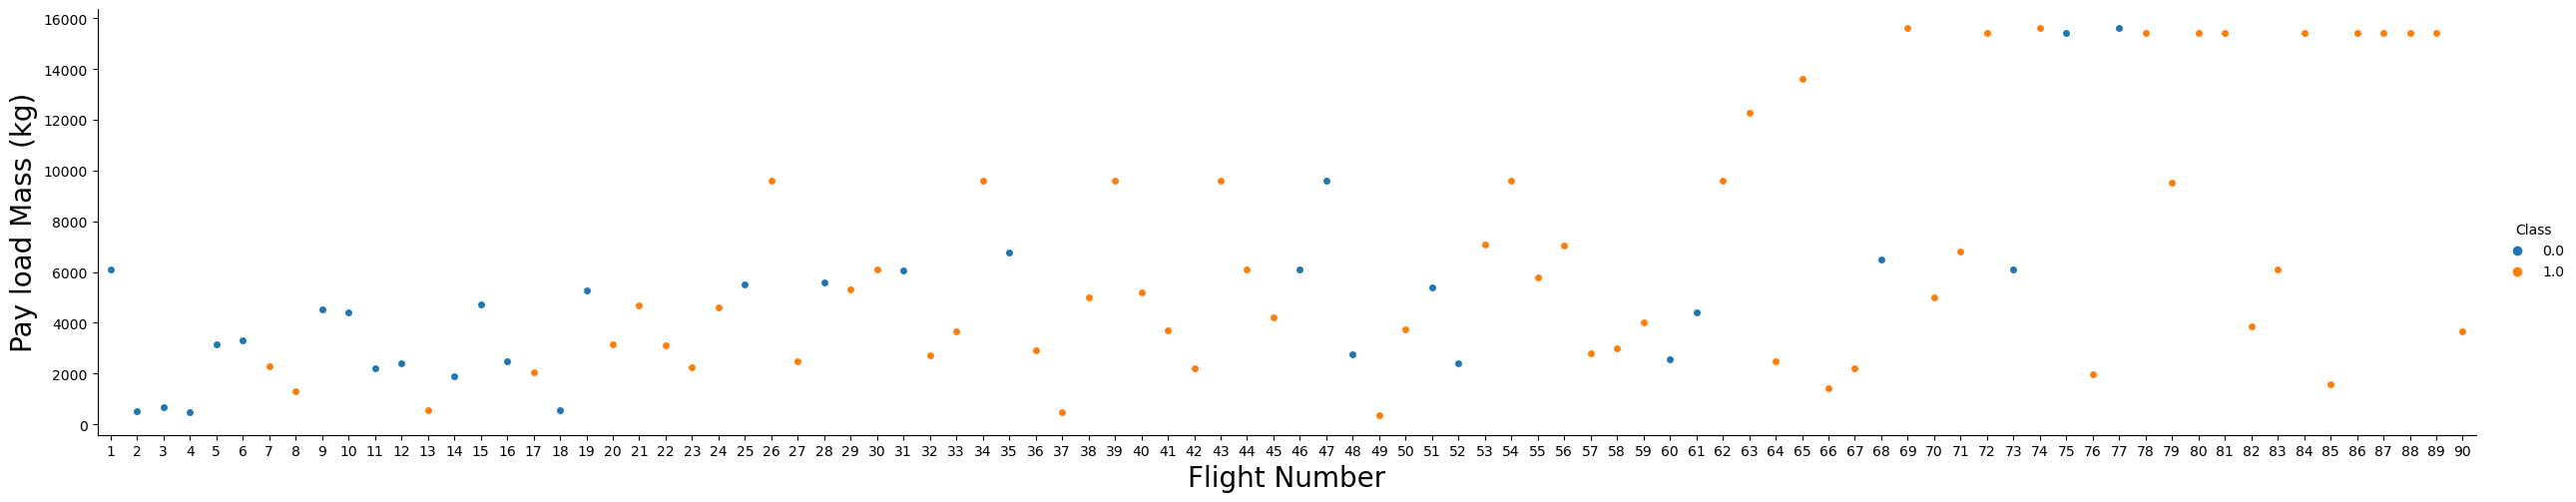

In [200]:
# As the flight number increases (indicating the continuous launch attempts), the first stage is more likely to land successfully. 
# The more massive the payload, the less likely the first stage will return.

sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

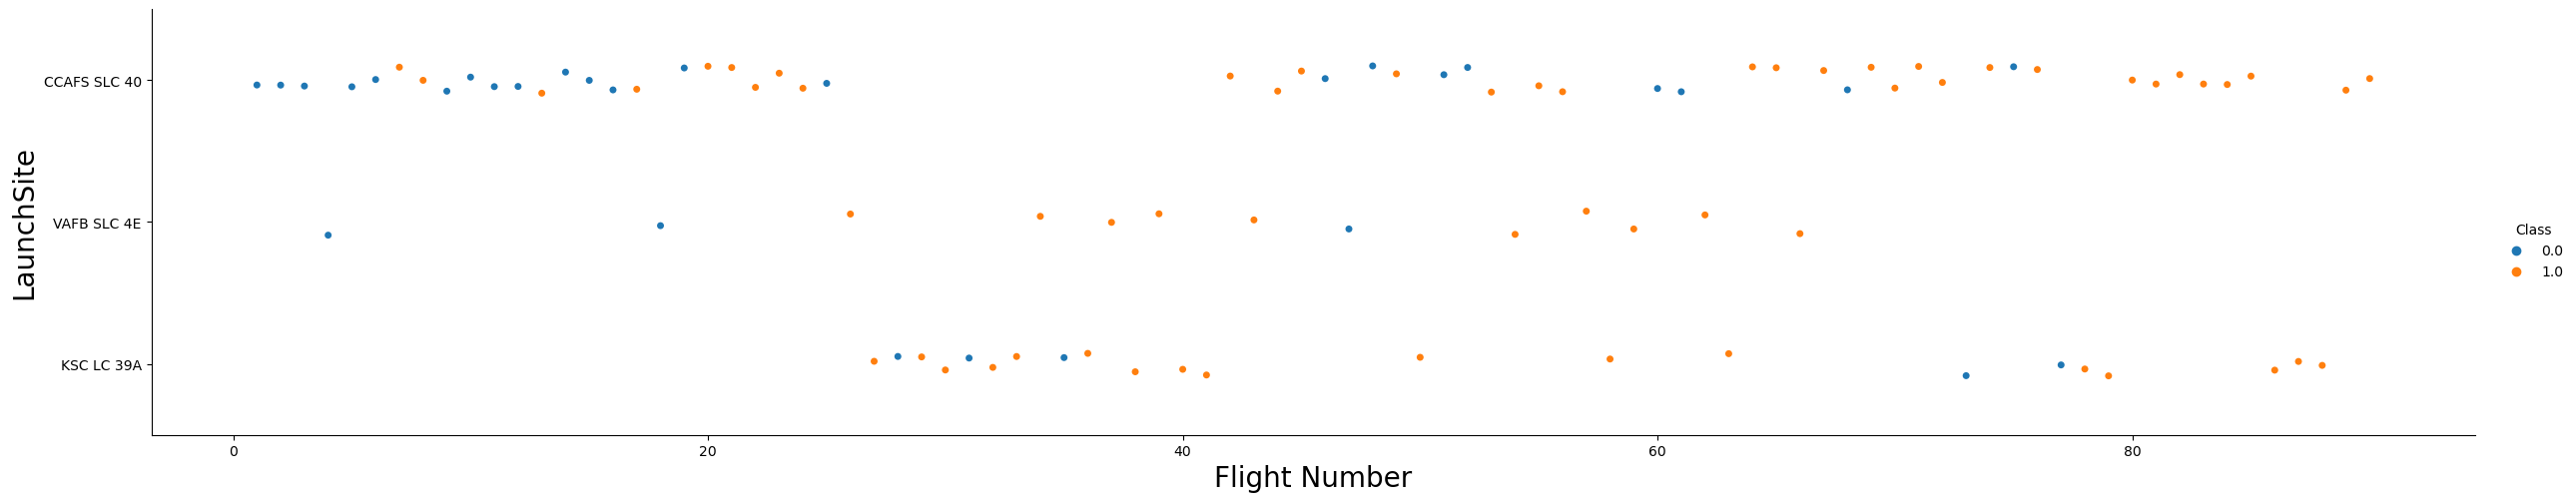

In [139]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("LaunchSite",fontsize=20)
plt.show()
# flight numner increases, more success
# KSC seemed to have more success

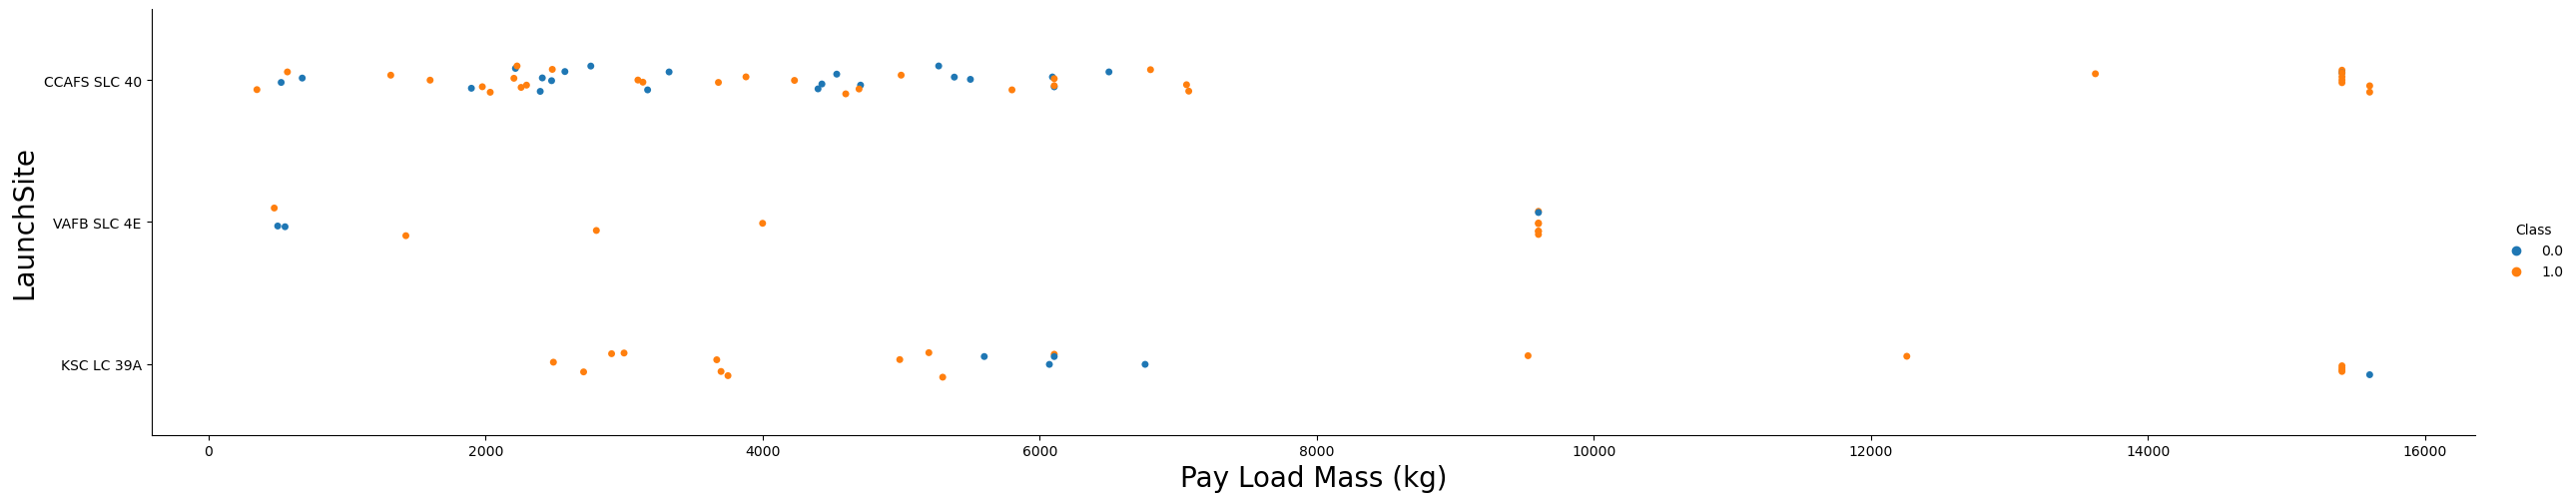

In [141]:
# relationship between launch sites and their payload mass
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("Pay Load Mass (kg)",fontsize=20)
plt.ylabel("LaunchSite",fontsize=20)
plt.show()
#  the VAFB-SLC launchsite had no rockets launched for heavypayload mass(greater than 10000)

In [180]:
succ_rate = df['Class'].groupby(df['Orbit']).mean()
print(pd.DataFrame(succ_rate))

print(list(succ_rate.index))
print(succ_rate.values)

          Class
Orbit          
ES-L1  1.000000
GEO    1.000000
GTO    0.518519
HEO    1.000000
ISS    0.619048
LEO    0.714286
MEO    0.666667
PO     0.666667
SO     0.000000
SSO    1.000000
VLEO   0.857143
['ES-L1', 'GEO', 'GTO', 'HEO', 'ISS', 'LEO', 'MEO', 'PO', 'SO', 'SSO', 'VLEO']
[1.         1.         0.51851852 1.         0.61904762 0.71428571
 0.66666667 0.66666667 0.         1.         0.85714286]


In [181]:
len(succ_rate.index)

11

In [187]:
# calculate the error bar for bar graph
err = []
for i, var in enumerate(succ_rate.index):
    xx = df['Class'].loc[df['Orbit'] == str(var)] 
    yy = scipy.stats.sem(xx)
    err.append(yy)

print(err)
print(list(succ_rate.index))
print(len(err))
print(len(list(succ_rate.index)))


[nan, nan, 0.09799078929868854, nan, 0.10858813572372743, 0.18442777839082938, 0.33333333333333337, 0.16666666666666666, nan, 0.0, 0.09705231721239392]
['ES-L1', 'GEO', 'GTO', 'HEO', 'ISS', 'LEO', 'MEO', 'PO', 'SO', 'SSO', 'VLEO']
11
11


Text(0.5, 1.0, 'Success Rate per Orbit')

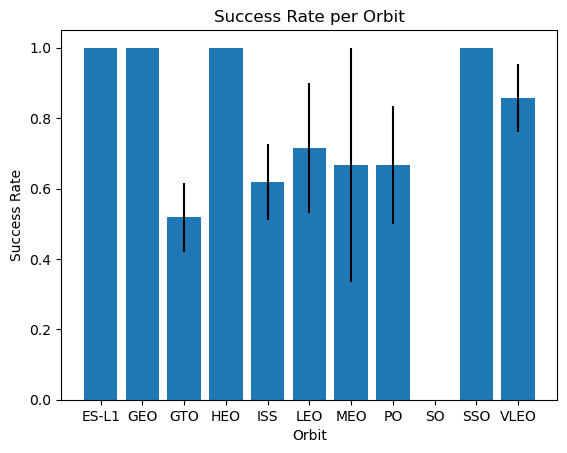

In [189]:
# relationship between success rate and orbit type
# not all bars have enough data points to be used to calculate a error bar
plt.bar(list(tmp.index),tmp.values, yerr = err)
plt.ylabel('Success Rate')
plt.xlabel('Orbit')
plt.title('Success Rate per Orbit')

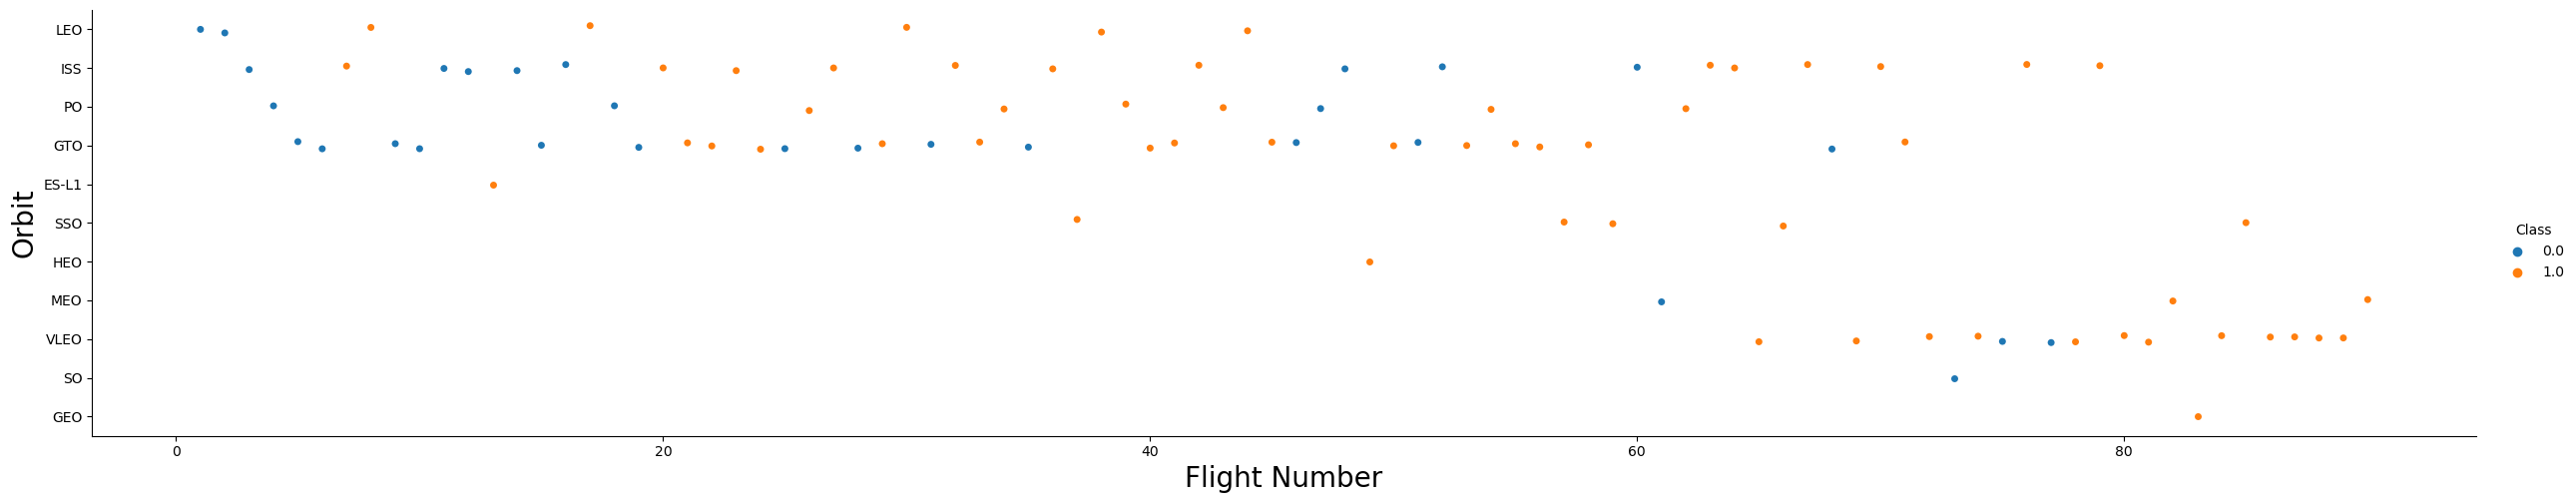

In [191]:
# the relationship between FlightNumber and their Orbit
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()
# the LEO orbit the Success appears related to the number of flights
# there seems to be no relationship between flight number when in GTO orbit.

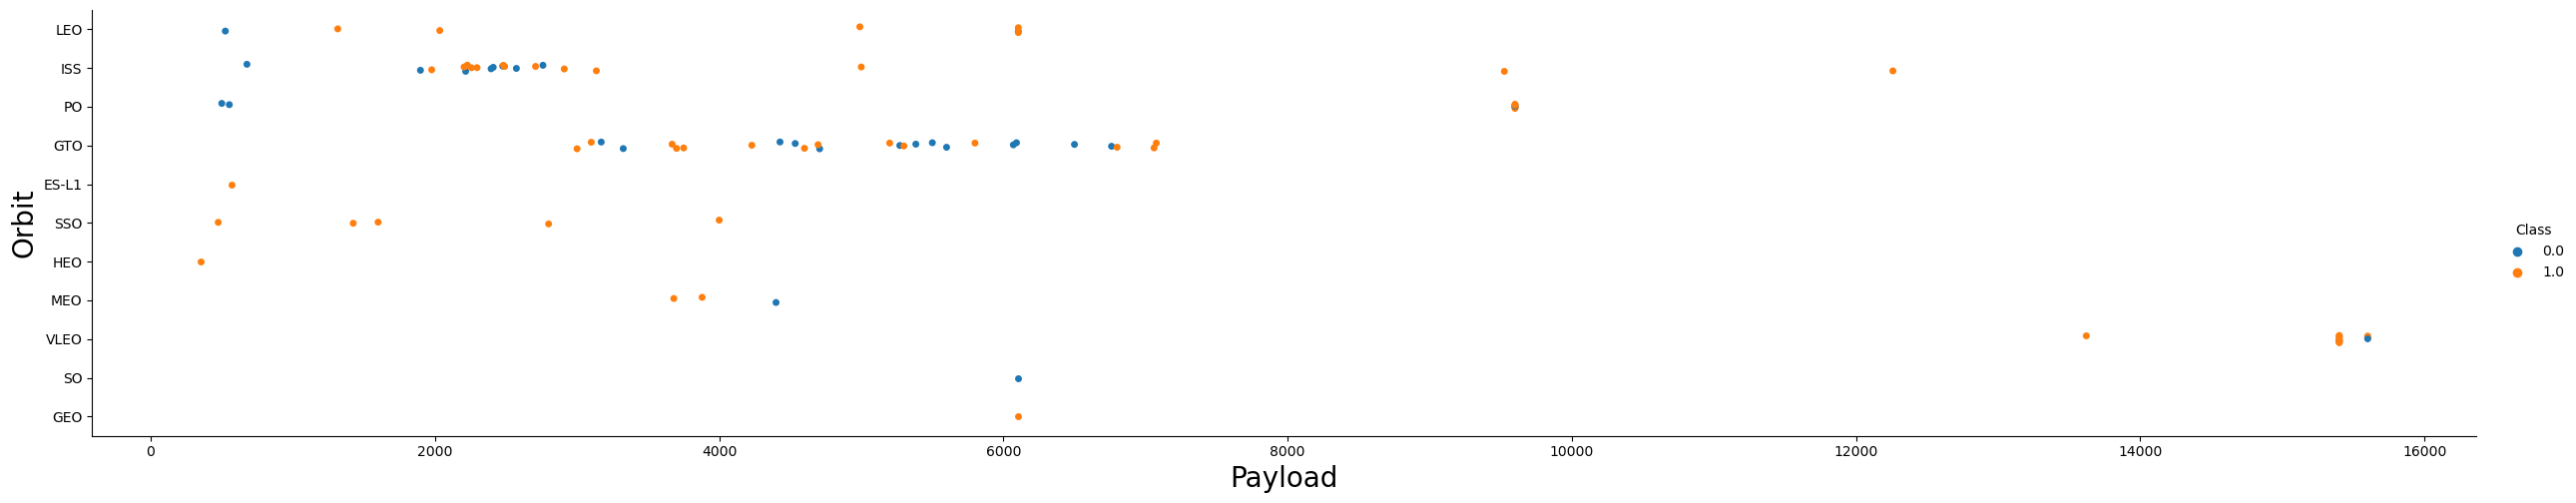

In [194]:
# the relationship between Payload and Orbit type
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("Payload",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()
# For heavy payloads, the successful landing (positive landing rate) are more for Po, LEO, and ISS

# for GTO it's not distinguishable ~ payload

In [202]:
# the launch success yearly trend
# A function to Extract years from the date 
year=[]
def Extract_year(date):
    for i in date:
        year.append(i.split("-")[0])
    return year


In [203]:
years = Extract_year(df["Date"])
# print(years)
df['Year'] = years
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,Year
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0.0,2010
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0.0,2012
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0.0,2013
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0.0,2013
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0.0,2013


In [208]:
df2 = df['Class'].groupby([df['Year']]).mean()

In [213]:
# calculate the error bar for line 
err2 = []
for i, var in enumerate(df2.index):
    xx = df['Class'].loc[df['Year'] == str(var)] 
    yy = scipy.stats.sem(xx)
    err2.append(yy)

print(err2)
print(list(df2.index))
print(len(err2))
print(len(list(df2.index)))

[nan, nan, 0.0, 0.210818510677892, 0.210818510677892, 0.18298126367784995, 0.0903876907577734, 0.11823563735376173, 0.09999999999999999, 0.085947008518708]
['2010', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
10
10


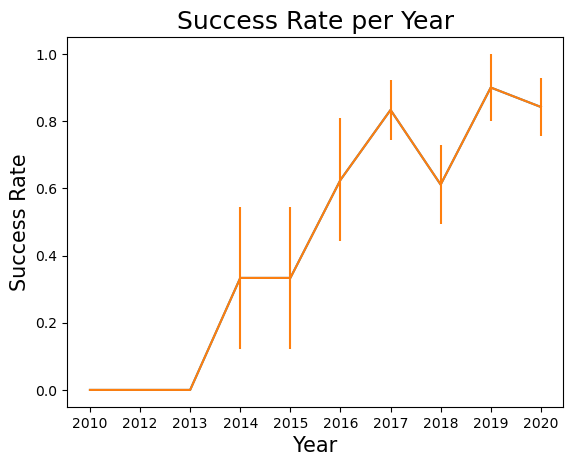

In [219]:
plt.plot(list(df2.index), list(df2.values))
plt.errorbar(list(df2.index), list(df2.values), yerr= err2)
plt.xlabel("Year",fontsize=15)
plt.ylabel("Success Rate",fontsize=15)
plt.title("Success Rate per Year",fontsize=18)

plt.show()

## Feature Engineering

In [226]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [227]:
# OneHotEncoder to the column Orbits, LaunchSite, LandingPad, and Serial
features_one_hot = pd.get_dummies(features[["Orbit", "LaunchSite", "LandingPad", "Serial"]])
features_one_hot[['FlightNumber', 'PayloadMass', 'Flights', 'GridFins', 'Reused', 'Legs', 'Block', 'ReusedCount']] = features[['FlightNumber', 'PayloadMass', 'Flights', 'GridFins', 'Reused', 'Legs', 'Block', 'ReusedCount']]
features_one_hot.head()

,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,...,Serial_B1060,Serial_B1062,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,6104.959412,1,False,False,False,1.0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,2,525.000000,1,False,False,False,1.0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,3,677.000000,1,False,False,False,1.0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,4,500.000000,1,False,False,False,1.0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,5,3170.000000,1,False,False,False,1.0,0


In [229]:
# cast the entire dataframe to variable type float64
features_one_hot.astype('float64')

,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,...,Serial_B1060,Serial_B1062,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,86.0,15400.000000,2.0,1.0,1.0,1.0,5.0,2.0
86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,87.0,15400.000000,3.0,1.0,1.0,1.0,5.0,2.0
87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,88.0,15400.000000,6.0,1.0,1.0,1.0,5.0,5.0
88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,89.0,15400.000000,3.0,1.0,1.0,1.0,5.0,2.0


In [230]:
# save interum results
features_one_hot.to_csv('dataset_part_3.csv', index=False)

In [231]:
features_one_hot.shape

(90, 80)

## Geospatial Viz & Dash

#### Plot Geospatial launch info

In [233]:
!pip3 install folium
!pip3 install wget

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.3/102.3 kB 2.2 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=242f566a5faceaad9873f9fa34340e340dfee49e8b75e1be2c77548061c31843
  Stored in directory: /Users/mayazwang/Library/Caches/pip/wheels/46/78/0e/8e5e2b500f83a682c8d7e7ce820638cf99faa894a662f71cf0
Successfully built wget


In [10]:
import folium
import wget
import pandas as pd

In [290]:
# Import folium MarkerCluster plugin
from folium.plugins import MarkerCluster
# Import folium MousePosition plugin
from folium.plugins import MousePosition
# Import folium DivIcon plugin
from folium.features import DivIcon

In [369]:
# Download and read the `spacex_launch_geo.csv`
spacex_csv_file = wget.download('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv')
spacex_df=pd.read_csv(spacex_csv_file)

In [370]:
# Select relevant sub-columns: `Launch Site`, `Lat(Latitude)`, `Long(Longitude)`, `class`
spacex_df = spacex_df[['Launch Site', 'Lat', 'Long', 'class']]
launch_sites_df = spacex_df.groupby(['Launch Site'], as_index=False).first()
launch_sites_df = launch_sites_df[['Launch Site', 'Lat', 'Long']]
launch_sites_df

,Launch Site,Lat,Long
0,CCAFS LC-40,28.562302,-80.577356
1,CCAFS SLC-40,28.563197,-80.576820
2,KSC LC-39A,28.573255,-80.646895
3,VAFB SLC-4E,34.632834,-120.610745


In [371]:
# Start location is NASA Johnson Space Center at Houston, Texas
nasa_coordinate = [29.559684888503615, -95.0830971930759]
site_map = folium.Map(location=nasa_coordinate, zoom_start=10)

In [372]:
# use folium.Circle to add a highlighted circle area with a text label on a specific coordinate
# Create a blue circle at NASA Johnson Space Center's coordinate with a popup label showing its name
circle = folium.Circle(nasa_coordinate, radius=1000, color='#d35400', fill=True).add_child(folium.Popup('NASA Johnson Space Center'))
# Create a blue circle at NASA Johnson Space Center's coordinate with a icon showing its name
marker = folium.map.Marker(
    nasa_coordinate,
    # Create an icon as a text label
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'NASA JSC',
        )
    )
site_map.add_child(circle)
site_map.add_child(marker)

In [373]:
launch_sites_LL = launch_sites_df[['Lat', 'Long']].values

In [374]:
for site in launch_sites_LL:
    print(site)

print(launch_sites_df['Launch Site'].iloc[1])
print(type(launch_sites_df['Launch Site'].iloc[1]))

[ 28.56230197 -80.57735648]
[ 28.56319718 -80.57682003]
[ 28.57325457 -80.64689529]
[  34.63283416 -120.6107455 ]
CCAFS SLC-40
<class 'str'>


In [375]:
# Create and add folium.Circle and folium.Marker for each launch site on the site map
# Initial the map
site_map = folium.Map(location=nasa_coordinate, zoom_start=5)
# For each launch site, add a Circle object based on its coordinate (Lat, Long) values. In addition, add Launch site name as a popup label
for x, site in enumerate(launch_sites_LL):
    label = launch_sites_df['Launch Site'].iloc[x]
    circle = folium.Circle(site, radius=1000, color='#000000', fill=True).add_child(folium.Popup(label))
    marker = folium.map.Marker(site, icon=DivIcon(icon_size=(20,20),icon_anchor=(0,0), html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % label, ))
    site_map.add_child(circle)
    site_map.add_child(marker)
site_map

##### Mark the success/failed launches for each site on the map

In [376]:
spacex_df.tail(10)

,Launch Site,Lat,Long,class
46,KSC LC-39A,28.573255,-80.646895,1
47,KSC LC-39A,28.573255,-80.646895,1
48,KSC LC-39A,28.573255,-80.646895,1
49,CCAFS SLC-40,28.563197,-80.576820,1
50,CCAFS SLC-40,28.563197,-80.576820,1
51,CCAFS SLC-40,28.563197,-80.576820,0
52,CCAFS SLC-40,28.563197,-80.576820,0
53,CCAFS SLC-40,28.563197,-80.576820,0
54,CCAFS SLC-40,28.563197,-80.576820,1
55,CCAFS SLC-40,28.563197,-80.576820,0


In [377]:
# create an cluster object (from folium.plugins import MarkerCluster)
marker_cluster = MarkerCluster()

In [378]:
# Create a new column in launch_sites dataframe called marker_color to store the marker colors based on the Class value
# Function to assign color to launch outcome
def assign_marker_color(launch_outcome):
    if launch_outcome == 1:
        return 'green'
    else:
        return 'red'
    
spacex_df['marker_color'] = spacex_df['class'].apply(assign_marker_color)
spacex_df.tail(10)

,Launch Site,Lat,Long,class,marker_color
46,KSC LC-39A,28.573255,-80.646895,1,green
47,KSC LC-39A,28.573255,-80.646895,1,green
48,KSC LC-39A,28.573255,-80.646895,1,green
49,CCAFS SLC-40,28.563197,-80.576820,1,green
50,CCAFS SLC-40,28.563197,-80.576820,1,green
51,CCAFS SLC-40,28.563197,-80.576820,0,red
52,CCAFS SLC-40,28.563197,-80.576820,0,red
53,CCAFS SLC-40,28.563197,-80.576820,0,red
54,CCAFS SLC-40,28.563197,-80.576820,1,green
55,CCAFS SLC-40,28.563197,-80.576820,0,red


In [379]:
# Add marker_cluster to current site_map
site_map.add_child(marker_cluster)

# for each row in spacex_df data frame
# create a Marker object with its coordinate
# and customize the Marker's icon property to indicate if this launch was successed or failed, 
# e.g., icon=folium.Icon(color='white', icon_color=row['marker_color']
for index, record in spacex_df.iterrows():
    site = record[['Lat', 'Long']].values
    label = record['Launch Site']
    marker = folium.map.Marker(site, icon=folium.Icon(color='white', icon_color=record['marker_color'], icon='info-sign',), popup=label,)
    
    marker_cluster.add_child(marker)

site_map

In [380]:
# Add Mouse Position to get the coordinate (Lat, Long) for a mouse over on the map
formatter = "function(num) {return L.Util.formatNum(num, 5);};"
mouse_position = MousePosition(
    position='topright',
    separator=' Long: ',
    empty_string='NaN',
    lng_first=False,
    num_digits=20,
    prefix='Lat:',
    lat_formatter=formatter,
    lng_formatter=formatter,
)

site_map.add_child(mouse_position)
site_map

In [381]:
from math import sin, cos, sqrt, atan2, radians

def calculate_distance(lat1, lon1, lat2, lon2):
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

In [382]:
# find coordinate of the closet coastline
launch_site_lat, launch_site_lon, coastline_lat, coastline_lon = [28.56242, -80.57811, 28.55414, -80.56596]
distance_coastline = calculate_distance(launch_site_lat, launch_site_lon, coastline_lat, coastline_lon)
distance_coastline

1.5024022412646343

In [383]:
# Create and add a folium.Marker on your selected closest coastline point on the map
# Display the distance between coastline point and launch site using the icon property 

coastline_cor = [coastline_lat, coastline_lon]
# print(coordinate)

coast_marker = folium.Circle(coastline_cor, radius=10, color='#000000', fill=True).add_child(folium.Popup('nearby coastline'))

distance_marker = folium.Marker(
   coastline_cor,
   icon=DivIcon(
   icon_size=(20,20),
   icon_anchor=(0,0),
   html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(distance_coastline),
       )
   )
site_map.add_child(coast_marker)
site_map.add_child(distance_marker)

In [384]:
# Create a `folium.PolyLine` object using the coastline coordinates and launch site coordinate
locs =  [[launch_site_lat, launch_site_lon],[coastline_lat, coastline_lon]]
print(type(locs))
lines=folium.PolyLine(locations=locs, weight=2)
site_map.add_child(lines)

<class 'list'>


In [15]:
spacex_df = pd.read_csv("spacex_launch_dash.csv")
spacex_df.head()

,Unnamed: 0,Flight Number,Launch Site,class,Payload Mass (kg),Booster Version,Booster Version Category
0,0,1,CCAFS LC-40,0,0.0,F9 v1.0 B0003,v1.0
1,1,2,CCAFS LC-40,0,0.0,F9 v1.0 B0004,v1.0
2,2,3,CCAFS LC-40,0,525.0,F9 v1.0 B0005,v1.0
3,3,4,CCAFS LC-40,0,500.0,F9 v1.0 B0006,v1.0
4,4,5,CCAFS LC-40,0,677.0,F9 v1.0 B0007,v1.0


In [17]:
spacex_df['class'].groupby(spacex_df['Launch Site']).mean()

Launch Site
CCAFS LC-40     0.269231
CCAFS SLC-40    0.428571
KSC LC-39A      0.769231
VAFB SLC-4E     0.400000
Name: class, dtype: float64

## Space X Falcon 9 First Stage Landing Prediction

Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch. In this lab, you will create a machine learning pipeline to predict if the first stage will land given the data from the preceding labs.

In [201]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [202]:
# load data
# data = pd.read_csv('dataset_part_2.csv') # from local 
data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [203]:
# X = pd.read_csv('dataset_part_3.csv')
# X is one-hot encoded for all categorical vars
X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_3.csv')
X.head(10)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5,6.0,3325.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
6,7.0,2296.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
7,8.0,1316.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
8,9.0,4535.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
9,10.0,4428.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [204]:
y = data['Class'].to_numpy()
print(type(y))
len(y)

<class 'numpy.ndarray'>


90

In [205]:
# Standardize the data in X then reassign it to the variable X
transform = preprocessing.StandardScaler()
transform.fit(X)
x =  transform.transform(X)
print(type(x))
print(x.shape)

<class 'numpy.ndarray'>
(90, 83)


In [206]:
# split into training and testing set
# set random_state to 2 for replicability
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)
Y_test.shape

(18,)

#### Grid search: logistic regression

In [207]:
# parameters: l-1 is lasso, l-2 is ridge for regularization -> use l2 here
# C is lambda, regularization strength
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}
lr=LogisticRegression()
# construct the grid search obj
logreg_cv = GridSearchCV(lr, parameters, cv=10)

# fit grid search obj
logreg_cv.fit(X_train, Y_train)
# the best parameters
best_params_=logreg_cv.best_estimator_
print("Tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)

# evaluation
# the best testing accuracy score

print("Training accuracy :",logreg_cv.best_score_)
print("Test accuracy based on best params:", best_params_.score(X_test, Y_test))

Tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Training accuracy : 0.8464285714285713
Test accuracy based on best params: 0.8333333333333334


In [208]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

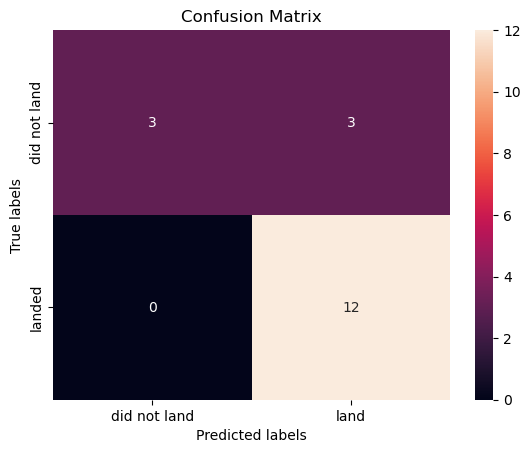

In [209]:
# confusion matrix for logistic regression
LogR_predictions = logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,LogR_predictions)

##### Insight: 
False positive is 3; false negative is 0

In [210]:
# conduct the logistic regression with the best parameters again
# Tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
LR = LogisticRegression(C=0.01, penalty = 'l2', solver = 'lbfgs').fit(X_train, Y_train)

In [211]:
d = pd.DataFrame()
d['features'] = list(X.columns)
d['coeffs'] = np.array(LR.coef_[0,])
d['abs_coef'] = abs(LR.coef_[0,])

d1 = d.sort_values(by='abs_coef', ascending=False)

d1


,features,coeffs,abs_coef
82,Legs_True,1.213370e-01,1.213370e-01
81,Legs_False,-1.213370e-01,1.213370e-01
78,GridFins_True,1.091954e-01,1.091954e-01
77,GridFins_False,-1.091954e-01,1.091954e-01
4,ReusedCount,7.829705e-02,7.829705e-02
...,...,...,...
38,Serial_B1016,-6.927145e-07,6.927145e-07
8,Orbit_HEO,-6.927145e-07,6.927145e-07
57,Serial_B1038,-6.927145e-07,6.927145e-07
45,Serial_B1023,-6.927145e-07,6.927145e-07


Logistic Regression Coefficients


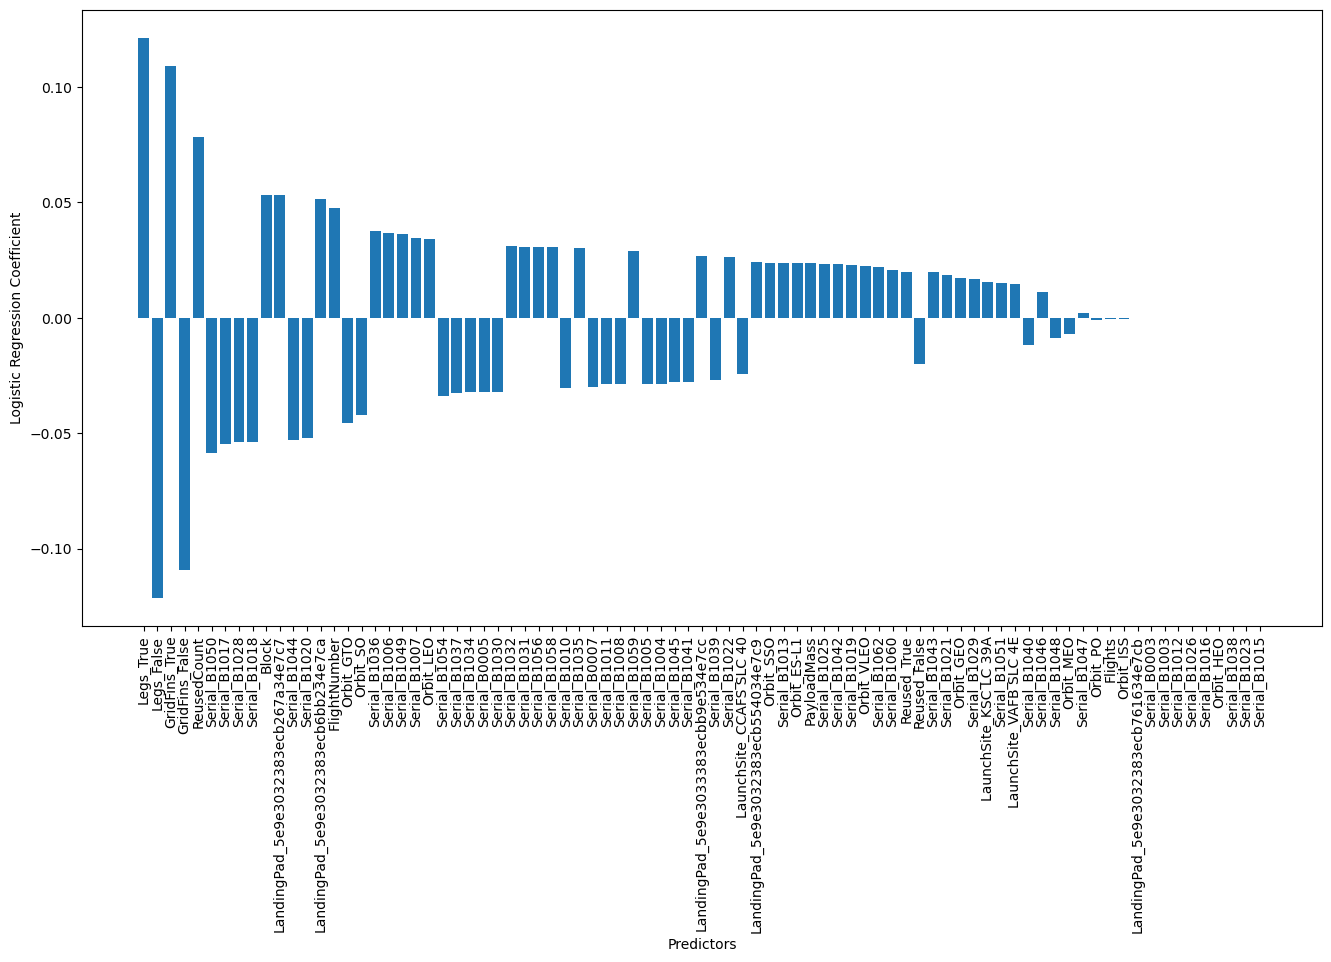

In [212]:
print('Logistic Regression Coefficients')
# print(LR.coef_, LR.intercept_)


plt.figure(figsize=(16,8))
plt.bar(d1['features'], d1['coeffs'])
plt.xticks(rotation='vertical')
plt.ylabel("Logistic Regression Coefficient")
plt.xlabel("Predictors")
plt.show()

##### It looks like that "Legs", "GridFins", "Rescued" are the 

##### most important predictors for whether the first stage landing will be successful

#### Grid search: SVM

In [213]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}

svm = SVC()
# construct the grid search obj
svm_cv = GridSearchCV(svm, parameters, cv=10)

# fit grid search obj
svm_cv.fit(X_train, Y_train)
# the best parameters
best_params_=svm_cv.best_estimator_
print("Tuned hpyerparameters :(best parameters) ",best_params_)

# evaluation
# the best testing accuracy score

print("Training accuracy :", svm_cv.best_score_)
print("Test accuracy based on best params:", best_params_.score(X_test, Y_test))

Tuned hpyerparameters :(best parameters)  SVC(gamma=0.03162277660168379, kernel='sigmoid')
Training accuracy : 0.8482142857142856
Test accuracy based on best params: 0.8333333333333334


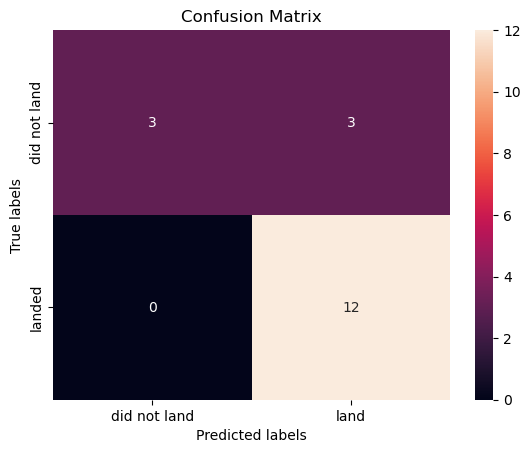

In [214]:
SVM_predictions = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test, SVM_predictions)

##### Insight: almost the same performance as logistic regression

#### Grid search: Decision Tree

In [215]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

# construct the grid search obj
tree_cv = GridSearchCV(tree, parameters, cv=10)

# fit grid search obj
tree_cv.fit(X_train, Y_train)
# the best parameters
best_params_=tree_cv.best_estimator_
print("Tuned hpyerparameters :(best parameters) ", best_params_)

# evaluation
# the best testing accuracy score

print("Training accuracy :", tree_cv.best_score_)
print("Test accuracy based on best params:", best_params_.score(X_test, Y_test))

Tuned hpyerparameters :(best parameters)  DecisionTreeClassifier(criterion='entropy', max_depth=2, max_features='sqrt',
                       min_samples_split=5, splitter='random')
Training accuracy : 0.8892857142857142
Test accuracy based on best params: 0.6666666666666666


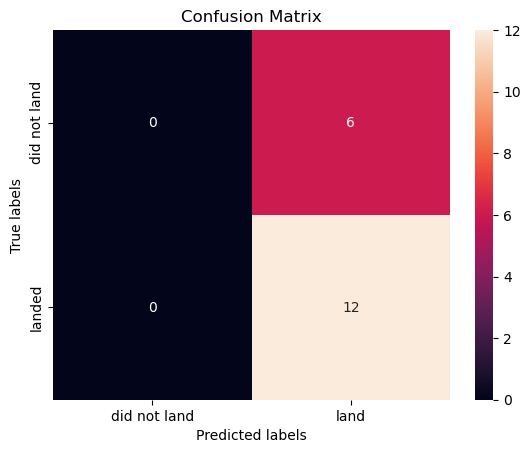

In [216]:
Tree_predictions = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test, Tree_predictions)

##### Insight: 
 - showed false negative (2) and higher false positive (4) -- not great
 - after a few repitition of the run, got different split and better results

#### Grid search: KNN

In [217]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

# construct the grid search obj
knn_cv = GridSearchCV(KNN, parameters, cv=10)

# fit grid search obj
knn_cv.fit(X_train, Y_train)
# the best parameters
best_params_=knn_cv.best_estimator_
print("Tuned hpyerparameters :(best parameters) ", best_params_)

# evaluation
# the best testing accuracy score

print("Training accuracy :", knn_cv.best_score_)
print("Test accuracy based on best params:", best_params_.score(X_test, Y_test))

Tuned hpyerparameters :(best parameters)  KNeighborsClassifier(n_neighbors=10, p=1)
Training accuracy : 0.8482142857142858
Test accuracy based on best params: 0.8333333333333334


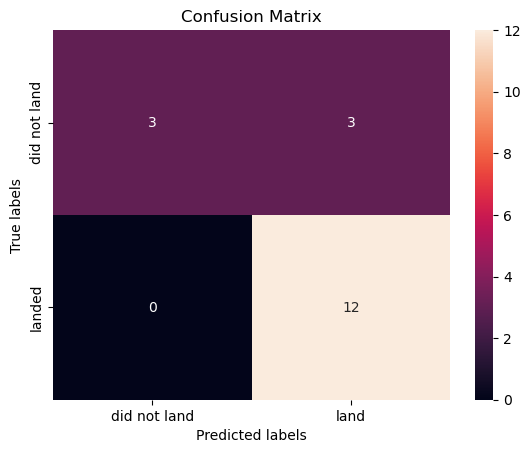

In [38]:
KNN_predictions = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,KNN_predictions)

##### Insight: almost the same performance as logistic regression and SVM

#### Find the method performs best

In [218]:
import sklearn.metrics as metrics

In [219]:
LR_Accuracy_Score = metrics.accuracy_score(Y_test, LogR_predictions)
LR_JaccardIndex = metrics.jaccard_score(Y_test, LogR_predictions)
LR_F1_Score = metrics.f1_score(Y_test, LogR_predictions)
LR_Log_Loss = metrics.log_loss(Y_test, LogR_predictions)

In [220]:
SVM_Accuracy_Score = metrics.accuracy_score(Y_test,SVM_predictions)
SVM_JaccardIndex = metrics.jaccard_score(Y_test,SVM_predictions)
SVM_F1_Score = metrics.f1_score(Y_test, SVM_predictions)

In [221]:
Tree_Accuracy_Score = metrics.accuracy_score(Y_test,Tree_predictions)
Tree_JaccardIndex = metrics.jaccard_score(Y_test,Tree_predictions)
Tree_F1_Score = metrics.f1_score(Y_test, Tree_predictions)

In [222]:
KNN_Accuracy_Score = metrics.accuracy_score(Y_test, KNN_predictions)
KNN_JaccardIndex = metrics.jaccard_score(Y_test, KNN_predictions)
KNN_F1_Score = metrics.f1_score(Y_test, KNN_predictions)

In [223]:
Report = pd.DataFrame()
Report['Models'] = ['Logistic Regression','SVM','Decision Tree', 'KNN']
Report['Accuracy'] = [LR_Accuracy_Score, SVM_Accuracy_Score, Tree_Accuracy_Score, KNN_Accuracy_Score]
Report['JaccardIndex'] = [LR_JaccardIndex, SVM_JaccardIndex, Tree_JaccardIndex, KNN_JaccardIndex]
Report['F1_Score'] = [LR_F1_Score, SVM_F1_Score, Tree_F1_Score, KNN_F1_Score]
Report['Log_Loss'] = [LR_Log_Loss, [], [], []]

print('Model evaluation metrics (on test data)')
Report

Model evaluation metrics (on test data)


,Models,Accuracy,JaccardIndex,F1_Score,Log_Loss
0,Logistic Regression,0.833333,0.800000,0.888889,5.756596
1,SVM,0.833333,0.800000,0.888889,[]
2,Decision Tree,0.666667,0.666667,0.800000,[]
3,KNN,0.833333,0.800000,0.888889,[]


Text(0.5, 1.0, 'Comparing Accuracy across Models')

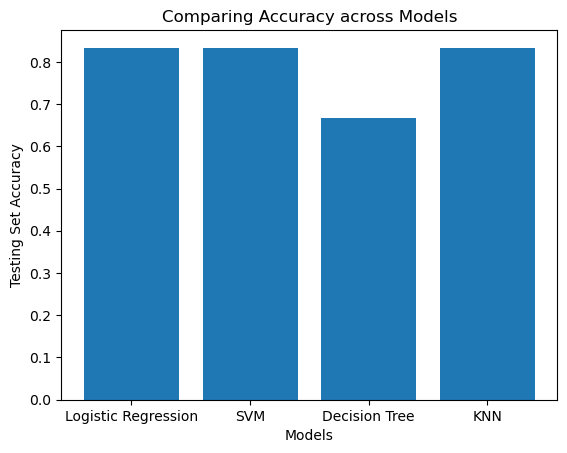

In [228]:
plt.bar(Report['Models'], Report['Accuracy'] )
plt.ylabel('Testing Set Accuracy')
plt.xlabel('Models')
plt.title('Comparing Accuracy across Models')

#### Insights:

#### - Logistic regression, SVM, and KNN all performed reasonably well on the testing data

#### - Decision tree did not do as well but with a few repitition (spliting in different ways), it achieved the same result

In [160]:
data.shape
# 90 samples and 18 predictors

(90, 18)

In [163]:
np.sqrt(18)

4.242640687119285

In [165]:
list(np.arange(1,20))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

#### Grid search: Random Forest

In [167]:
from sklearn.ensemble import RandomForestClassifier

In [171]:
# min_samples_split: The minimum number of samples required to split an internal node.
# max_depth: The maximum depth of the tree.
# n_estimators: The number of Decision Trees that make up the Random Forest. 
param_grid = { 
    'n_estimators': [10,50,100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2, 4, 8, 16, 32, 64, None],
    'criterion' :['gini', 'entropy']
}

rfc = RandomForestClassifier()
                           
# construct the grid search obj
rndForest_cv = GridSearchCV(rfc, param_grid, cv=10)

# fit grid search obj
rndForest_cv.fit(X_train, Y_train)
# the best parameters
best_params_=rndForest_cv.best_estimator_
print("Tuned hpyerparameters :(best parameters) ", best_params_)

# evaluation
# the best testing accuracy score

print("Training accuracy :", rndForest_cv.best_score_)
print("Test accuracy based on best params:", best_params_.score(X_test, Y_test))

Tuned hpyerparameters :(best parameters)  RandomForestClassifier(max_depth=2, max_features='log2')
Training accuracy : 0.875
Test accuracy based on best params: 0.8333333333333334


In [172]:
best_params_

RandomForestClassifier(max_depth=2, max_features='log2')

In [174]:
from sklearn.metrics import accuracy_score

In [229]:
random_forest_model = RandomForestClassifier(n_estimators = 50,
                                             max_features='log2',
                                             max_depth = 2, 
                                             min_samples_split = 10).fit(X_train,Y_train)

print(f"Metrics train:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_train),Y_train):.4f}")
      
print(f"Metrics test:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_test),Y_test):.4f}")

Metrics train:
	Accuracy score: 0.8611
Metrics test:
	Accuracy score: 0.8333


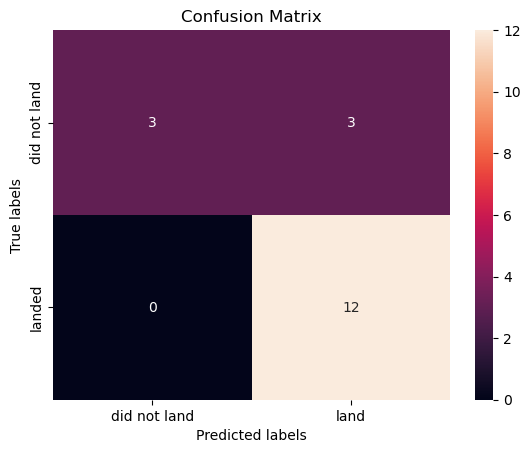

In [230]:
plot_confusion_matrix(Y_test,random_forest_model.predict(X_test))

##### Feature importance based on feature permutation

In [182]:
importances = random_forest_model.feature_importances_
# std = np.std([tree.feature_importances_ for tree in random_forest_model.estimators_], axis=0)

In [196]:
d2 = pd.DataFrame()
d2['features'] = list(X.columns)
d2['importances'] = importances

d3 = d2.sort_values(by='importances', ascending=False)

d3


,features,importances
82,Legs_True,0.159813
78,GridFins_True,0.128408
77,GridFins_False,0.106844
4,ReusedCount,0.099239
81,Legs_False,0.068978
...,...,...
47,Serial_B1026,0.000000
49,Serial_B1029,0.000000
51,Serial_B1031,0.000000
55,Serial_B1036,0.000000


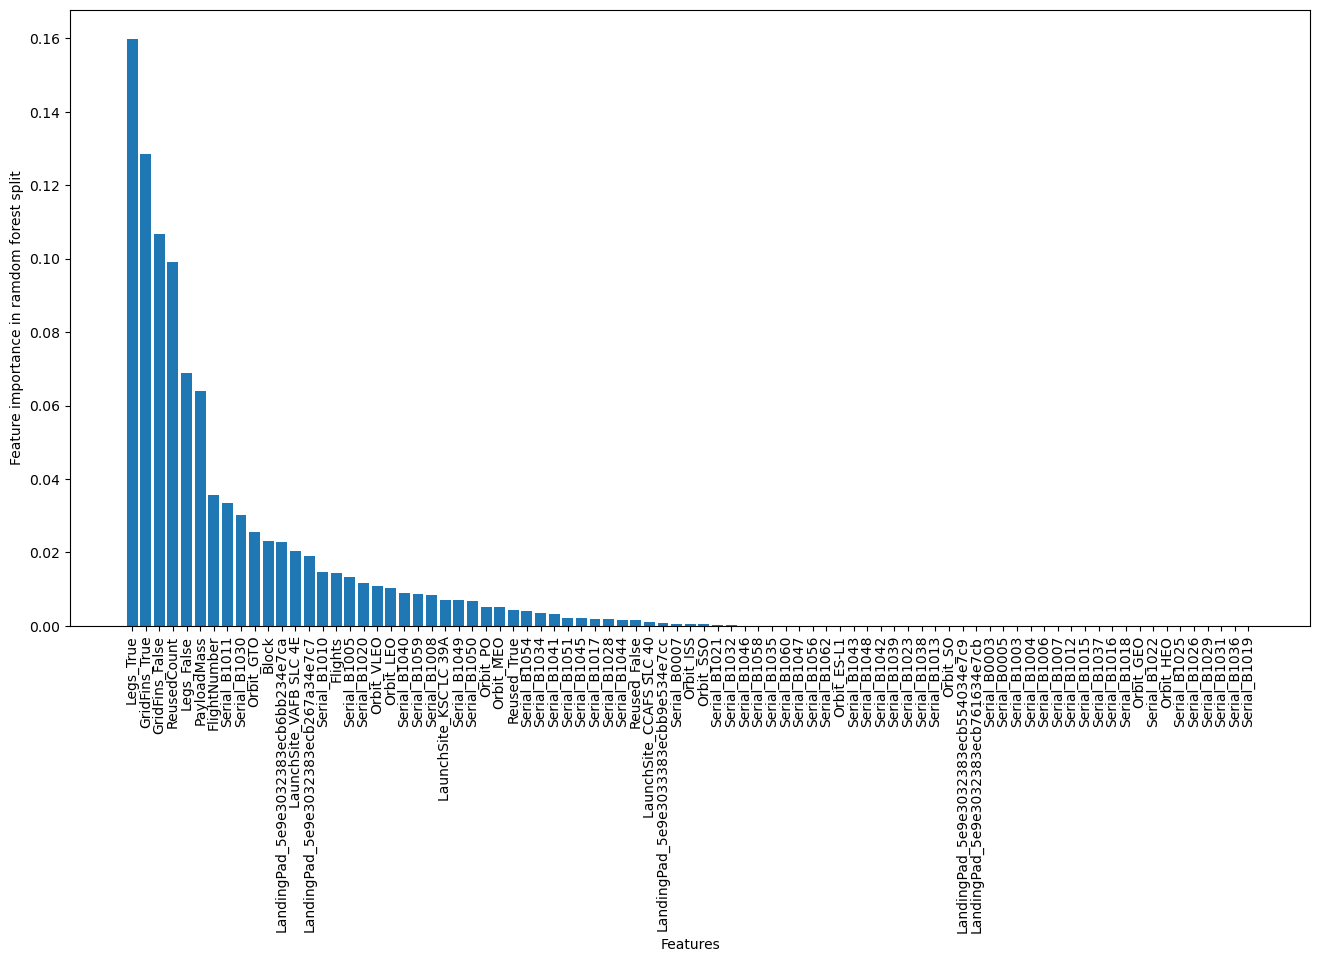

In [197]:
plt.figure(figsize = (16,8))
plt.bar(d3['features'], d3['importances'])
plt.xticks(rotation='vertical')
plt.ylabel("Feature importance in ramdom forest split")
plt.xlabel("Features")
plt.show()

#### According to the best tuned Random Forest model, the most important features for predicitng 

#### successful stage 1 landing of SpaceX are Legs, GridFins, Rescued, Payloadmass, and FlightNumber.

#### Pretty similar to what were indicated by logistic regression